In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('News.csv',index_col=0)
data.head()


,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [3]:
data.shape

(44919, 5)

In [4]:
data = data.drop(["subject","date"], axis = 1)


In [5]:
data.isnull().sum()


title    0
text     0
class    0
dtype: int64

In [6]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)


In [7]:
# Check the data
data.head()

,title,text,class
0,State of Hawaii asks judge to clarify Trump tr...,(Reuters) - The state of Hawaii on Thursday as...,1
1,Israel willing to resort to military action to...,TOKYO (Reuters) - Israel is willing to resort ...,1
2,Clinton leads Trump by 5 points in presidentia...,NEW YORK (Reuters) - Democratic presidential c...,1
3,Russia: Asia should not be militarized under p...,MOSCOW (Reuters) - Russia is opposed to the mi...,1
4,BOOM! TED CRUZ Will Conduct Hearing TODAY: Foc...,Ted Cruz has no interest in playing Mr Nice G...,0


<Axes: xlabel='class', ylabel='count'>

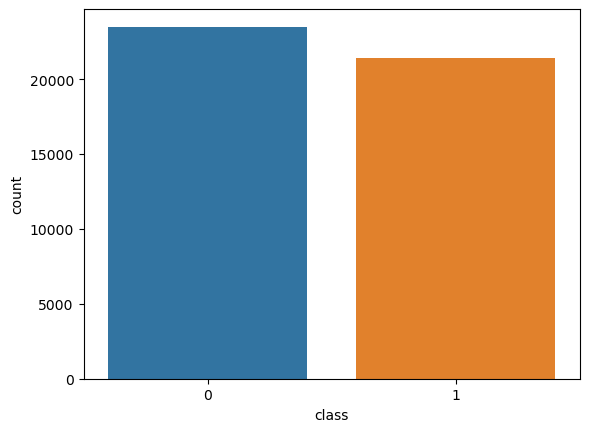

In [8]:
sns.countplot(data=data,
			x='class',
			order=data['class'].value_counts().index)


In [9]:
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Arpan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Arpan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Arpan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Arpan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
def preprocess_text(text_data):
	preprocessed_text = []
	
	for sentence in tqdm(text_data):
		sentence = re.sub(r'[^\w\s]', '', sentence)
		preprocessed_text.append(' '.join(token.lower()
								for token in str(sentence).split()
								if token not in stopwords.words('english')))

	return preprocessed_text


In [12]:
preprocessed_review = preprocess_text(data['text'].values)
data['text'] = preprocessed_review


100%|██████████| 44919/44919 [41:32<00:00, 18.02it/s]  


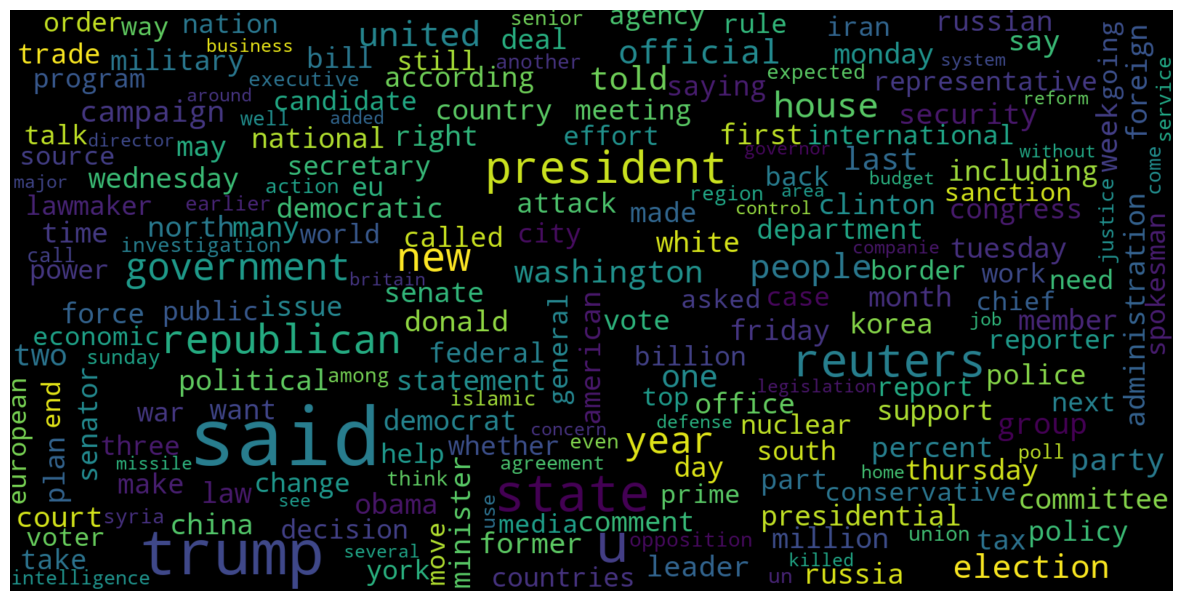

In [13]:
# Real
consolidated = ' '.join(
	word for word in data['text'][data['class'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
					height=800,
					random_state=21,
					max_font_size=110,
					collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()


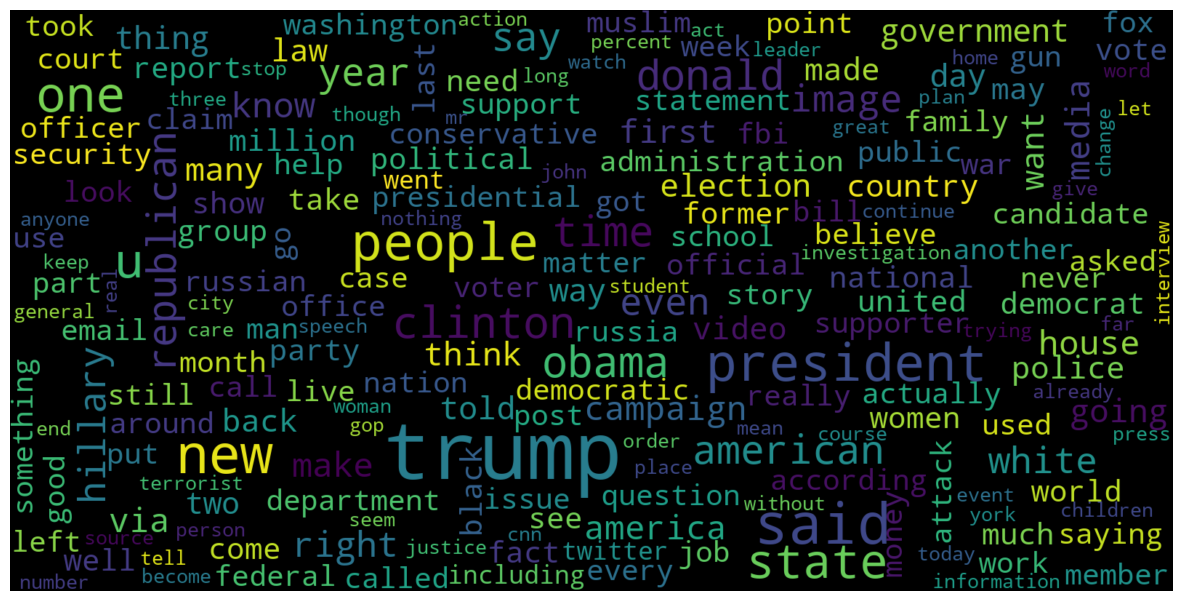

In [14]:
# Fake
consolidated = ' '.join(
	word for word in data['text'][data['class'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
					height=800,
					random_state=21,
					max_font_size=110,
					collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()


<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

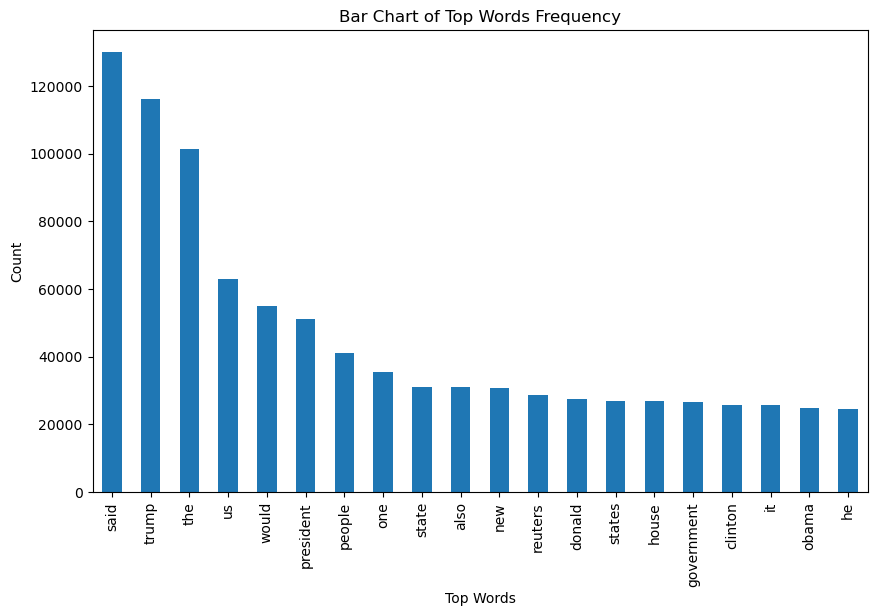

In [15]:
from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
	vec = CountVectorizer().fit(corpus)
	bag_of_words = vec.transform(corpus)
	sum_words = bag_of_words.sum(axis=0)
	words_freq = [(word, sum_words[0, idx])
				for word, idx in vec.vocabulary_.items()]
	words_freq = sorted(words_freq, key=lambda x: x[1],
						reverse=True)
	return words_freq[:n]


common_words = get_top_n_words(data['text'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
	kind='bar',
	figsize=(10, 6),
	xlabel="Top Words",
	ylabel="Count",
	title="Bar Chart of Top Words Frequency"
)


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(data['text'],
													data['class'],
													test_size=0.25)


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)


In [18]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train, y_train)

# testing the model
pred_LR = LR.predict(x_test)

print(LR.score(x_train, y_train))
print(LR.score(x_test, y_test))


0.9934103119712666
0.9910062333036509


In [19]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

# testing the model
pred_DT = DT.predict(x_test)

print(DT.score(x_train, y_train))
print(DT.score(x_test, y_test))

0.9999703167205913
0.9964381121994658


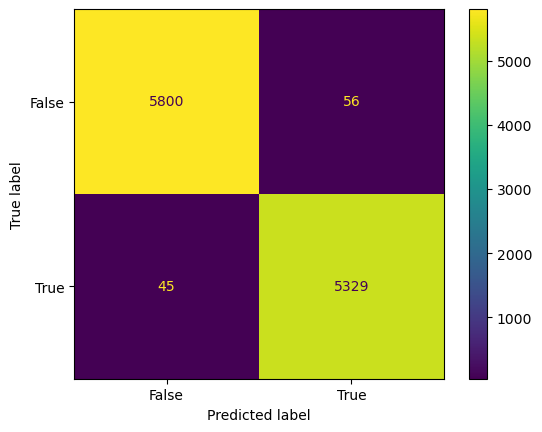

In [20]:
# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, LR.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
											display_labels=[False, True])

cm_display.plot()
plt.show()


In [21]:
def output_lable(n):

    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"

def manual_testing(news):

    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    
    new_x_test = new_def_test["text"]
    new_x_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_x_test)
    pred_DT = DT.predict(new_x_test)
    
    

    return print("\n\nLR Prediction: {} \nDT Prediction: {}".format(output_lable(pred_LR[0]),
                                                                                                         output_lable(pred_DT[0]),
                                                                                                        ))

In [34]:
news=str(input())
manual_testing(news)

Arizona Republican Senator Jeff Flake has never been a fan of Donald Trump or his incendiary, divisive brand of politics. Now, he is a leading GOP voice against electing Roy Moore (R-AL) to the United States Senate. Moore is an accused child molester, and has a lifetime history of making all kinds of bigoted and incendiary comments. He has said that homosexuality should be illegal, and that Muslims should not be allowed to serve in Congress. Moore was also removed twice from the Alabama Supreme Court for refusing to comply with higher court rulings. Well, Flake has finally had enough of his party enabling characters like Moore. He had already said that if he lived in Alabama, he d be voting fo


LR Prediction: Fake News 
DT Prediction: Fake News
